AIM: Analyze genes to find associated annotated terms (Part 3/3, ASAH ANALYSIS PIPELINE)

In [53]:
#Switch to working directory
cd '/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/R_work'

In [3]:
head results_deseq_analysis.tsv

"baseMean"	"log2FoldChange"	"lfcSE"	"stat"	"pvalue"	"padj"
"Nos1ap"	140.962569972171	1.58479823201758	0.351499208168535	4.50868222513239	6.52315275031398e-06	0.0328591557398734
"Nnt"	1236.2574615044	0.987190104698533	0.22169776340653	4.45286451937862	8.47322221244802e-06	0.0328591557398734
"Tpm2"	221.140233658757	1.2550027017943	0.295434063199892	4.24799594265187	2.15691300183746e-05	0.0353133793893234
"Pctp"	1392.6050841415	-0.982087366843469	0.23300245544383	-4.21492282118985	2.49863621485153e-05	0.0353133793893234
"Acly"	3794.17364469636	1.56246610168814	0.370072189414404	4.2220576049245	2.4208221779725e-05	0.0353133793893234
"Cyp26a1"	173.597260648508	1.5863726673814	0.378181229007259	4.19474195360169	2.73182408891104e-05	0.0353133793893234
"Rassf4"	154.384984247231	-1.37409308108365	0.335342913595826	-4.09757601957198	4.17499078988503e-05	0.0462588979519261
"Tat"	14302.640515232	0.93753031177965	0.237435208879734	3.94857323900319	7.8618363972383e-05	0.0762205038712253
"Il1r1"	621.

In [23]:
#Replacing the first line to include "Gene" header
header="Gene\tbaseMean\tlog2FoldChange\tlfcSE\tstat\tpvalue\tpadj"
sed -i -e "1s/.*/$header/" results_deseq_analysis.tsv

In [28]:
head -n 4 results_deseq_analysis.tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
"Nos1ap"	140.962569972171	1.58479823201758	0.351499208168535	4.50868222513239	6.52315275031398e-06	0.0328591557398734
"Nnt"	1236.2574615044	0.987190104698533	0.22169776340653	4.45286451937862	8.47322221244802e-06	0.0328591557398734
"Tpm2"	221.140233658757	1.2550027017943	0.295434063199892	4.24799594265187	2.15691300183746e-05	0.0353133793893234


In [29]:
head -1 results_deseq_analysis.tsv
grep -n Pctp results_deseq_analysis.tsv
grep -n Cyp26a1 results_deseq_analysis.tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
5:"Pctp"	1392.6050841415	-0.982087366843469	0.23300245544383	-4.21492282118985	2.49863621485153e-05	0.0353133793893234
7:"Cyp26a1"	173.597260648508	1.5863726673814	0.378181229007259	4.19474195360169	2.73182408891104e-05	0.0353133793893234


As we can see, Pctp has a log fold change that indicates down regulation (~ -1) with padj value < 0.05 while Cyp26a1

In [70]:
#Removing double quotes
cat results_deseq_analysis.tsv | tr -d \" > clean_results_deseq_analysis.tsv

# FILTERING UP/DOWN-REGULATED GENES

In [71]:
#Extract up/down-regulated proteins with padj < 0.05 and no NA values
awk '$3 != "NA" && $3 > 0.2 && $7 < 0.5 {print $1}' clean_results_deseq_analysis.tsv > up-logFC2-p5.tsv
awk '$3 != "NA" && $3 < -0.2 && $7 < 0.5 {print $1}' clean_results_deseq_analysis.tsv > down-logFC2-p5.tsv

In [72]:
head up-logFC2-p5.tsv

Nos1ap
Nnt
Tpm2
Acly
Cyp26a1
Tat
Il1r1
Acmsd
Orm3
Slc25a15


In [73]:
head down-logFC2-p5.tsv

Pctp
Rassf4
G0s2
Emr1
Mpeg1
Ifit3
Apoa1
Ptprc
Cfp
Inhbe


# ANNOTATING REGULATED GENES

Checking annotation on: http://www.mousemine.org/mousemine/bag.do

# <center>MOUSEMINE </center>


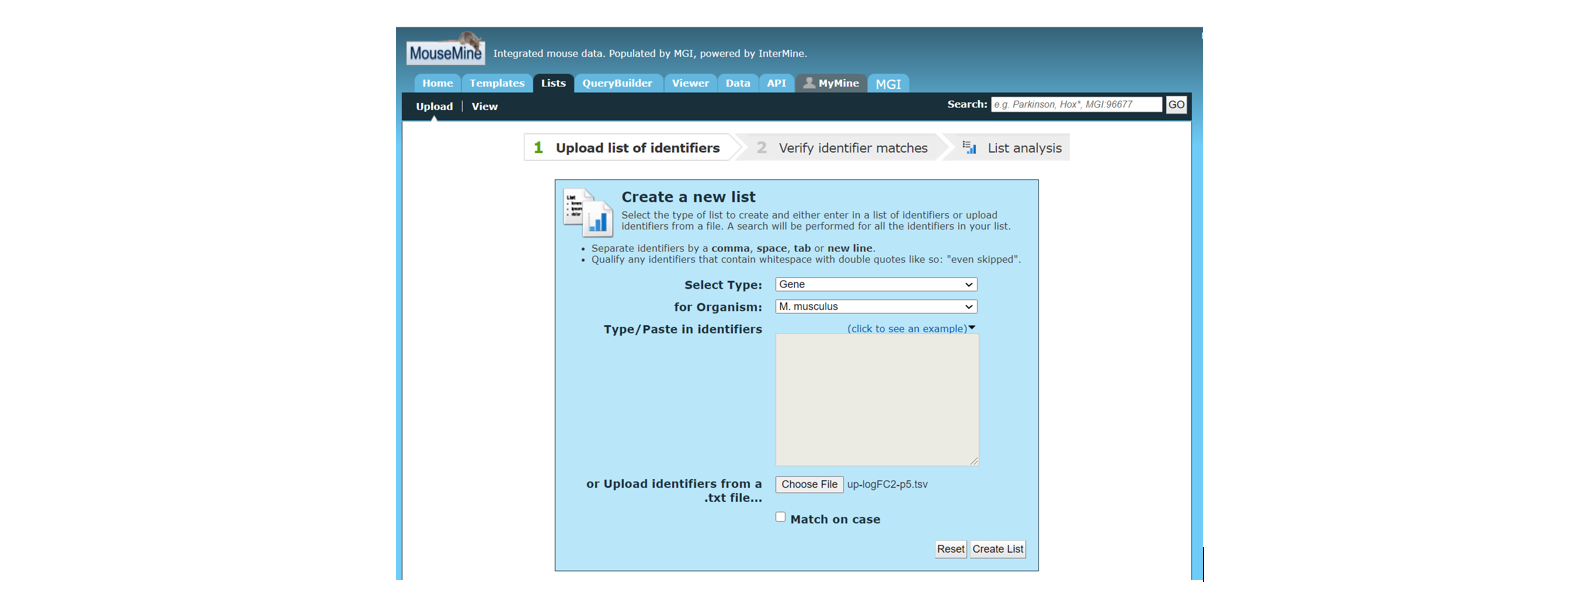

**UPREGUALTED GENES** <br />
Most impact occurs on the metabolic process which is understandable since the transgneic ASAH ceramidase lysozome enzyme is known to upregulate many metabolites as part of its biological processes

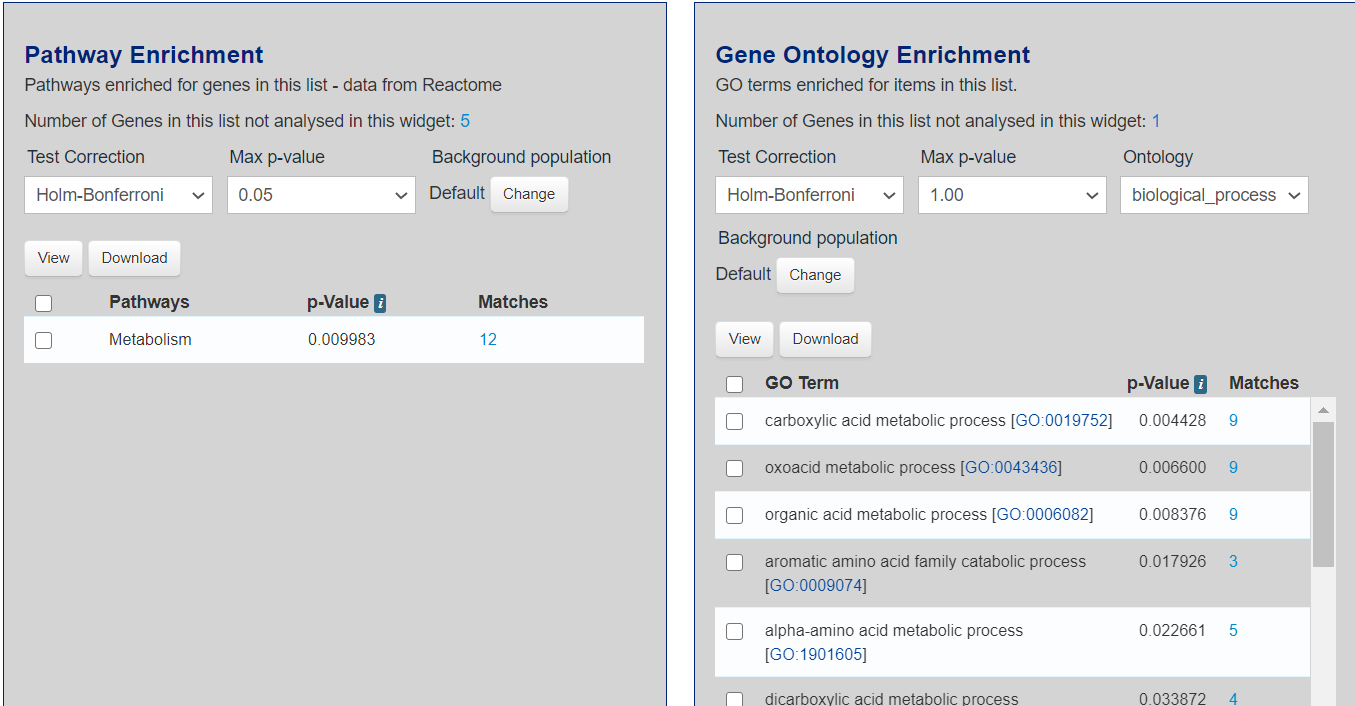

These genes span a total of 11 chromosome targets and 153 protein interactions

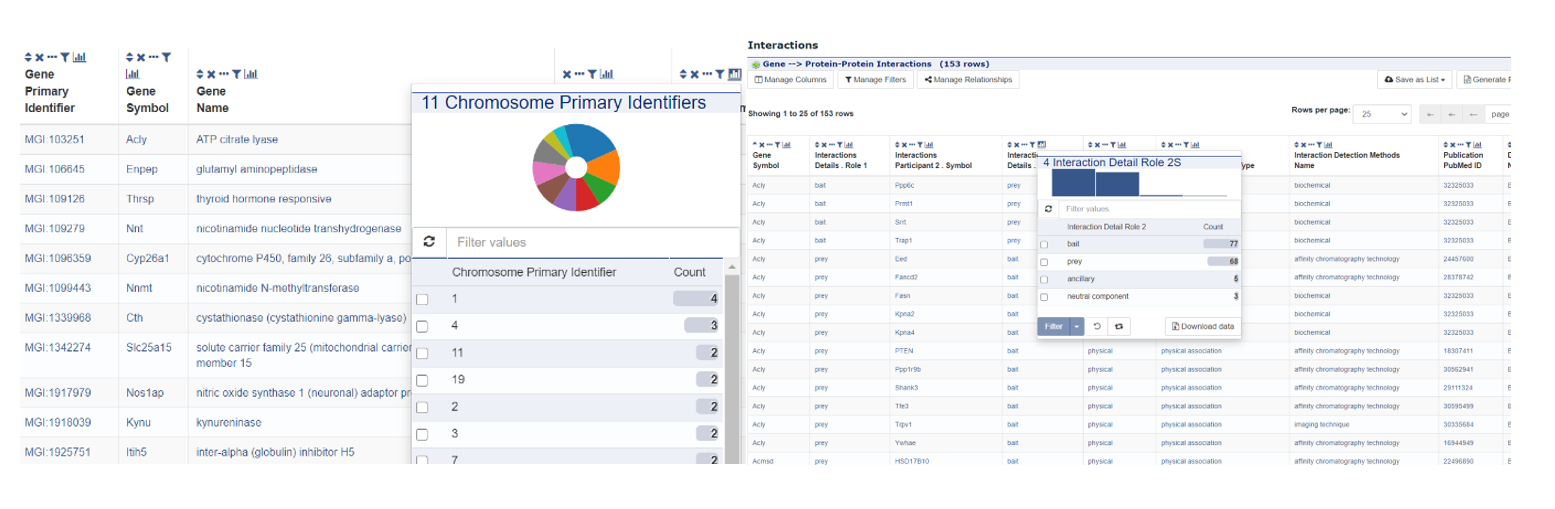

**DOWNREGULATED GENES** <br />
These gene targets seem to affect defense response in the cell. So the effect of ASAH treatment might impact the immune response of the cell.

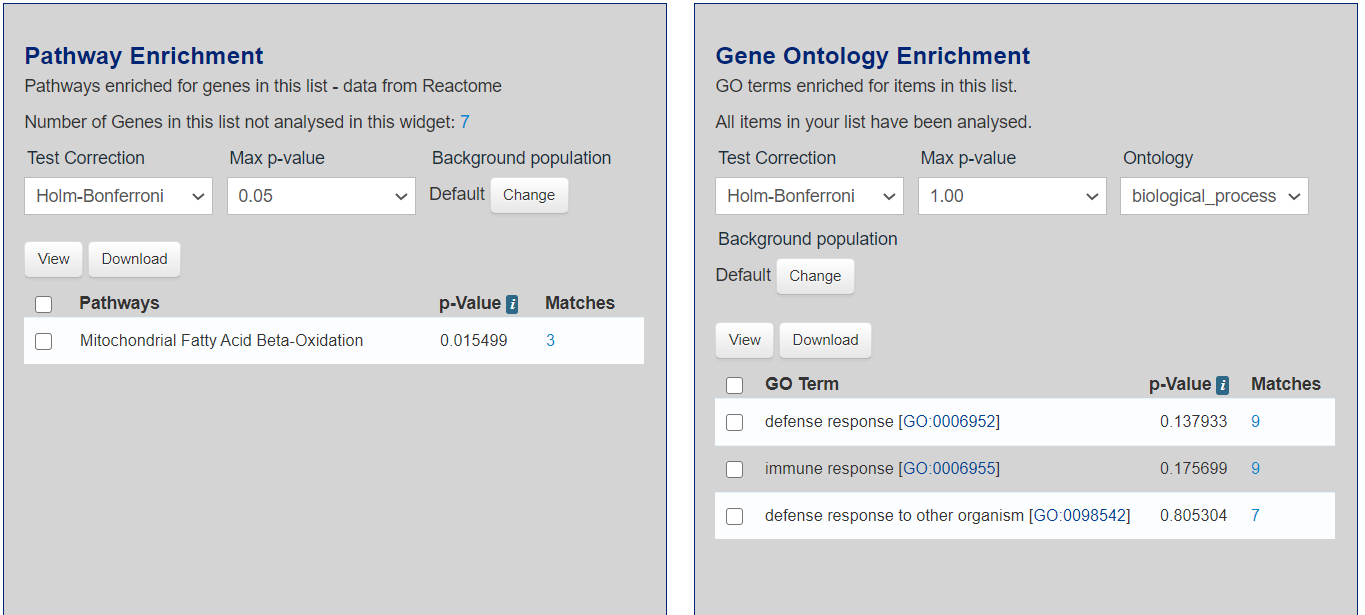

These genes span a total of 12 chromosome targets and 144 protein interactions

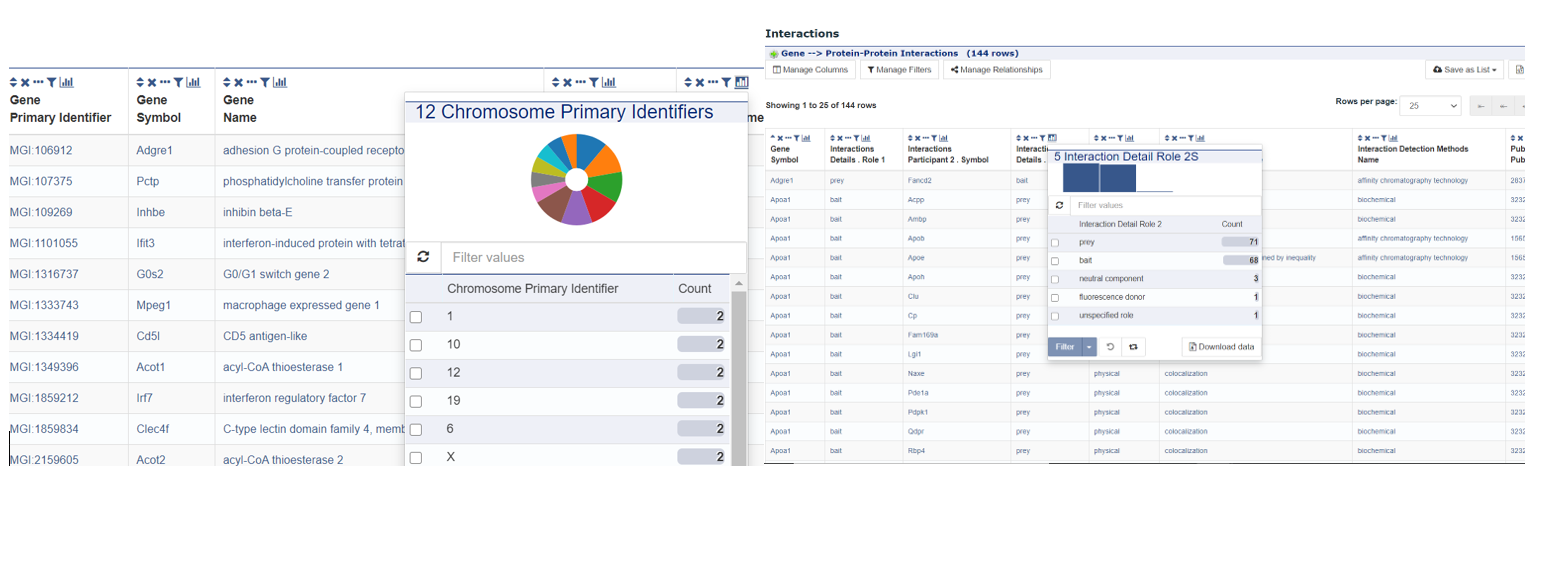

Checking annotation on: https://biit.cs.ut.ee/gprofiler/gost

# <center>GPROFILER </center><br /> 

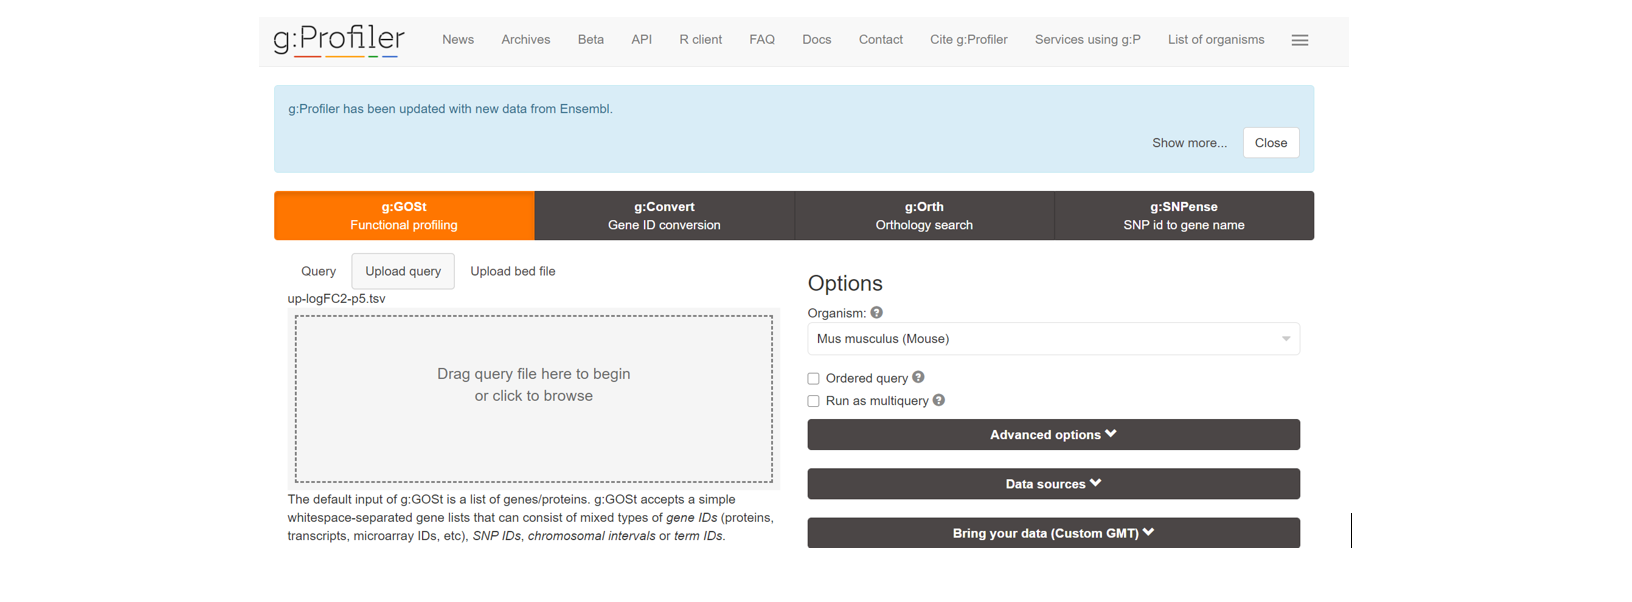

UPREGULATED: Mostly metabolomic molecular functions and a single annotated transcription factor for given parameters (default)

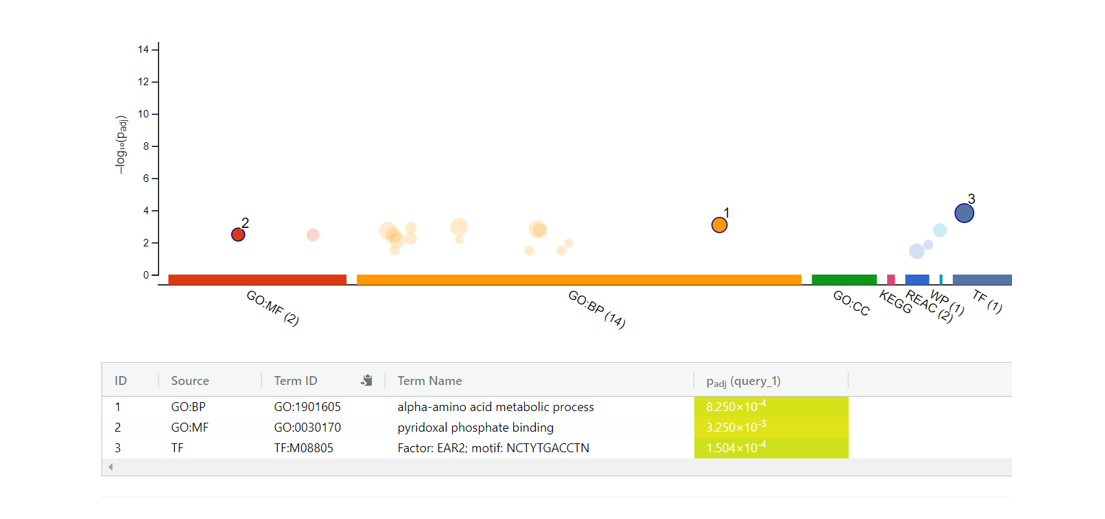

DOWNREGULATED: All molecular functions related to defense system (makes sense because the ASAH transgenic+ models will not need to create immune response to alcohol diet since their tolerance will be improved with the effect of ASAH transgene expression)

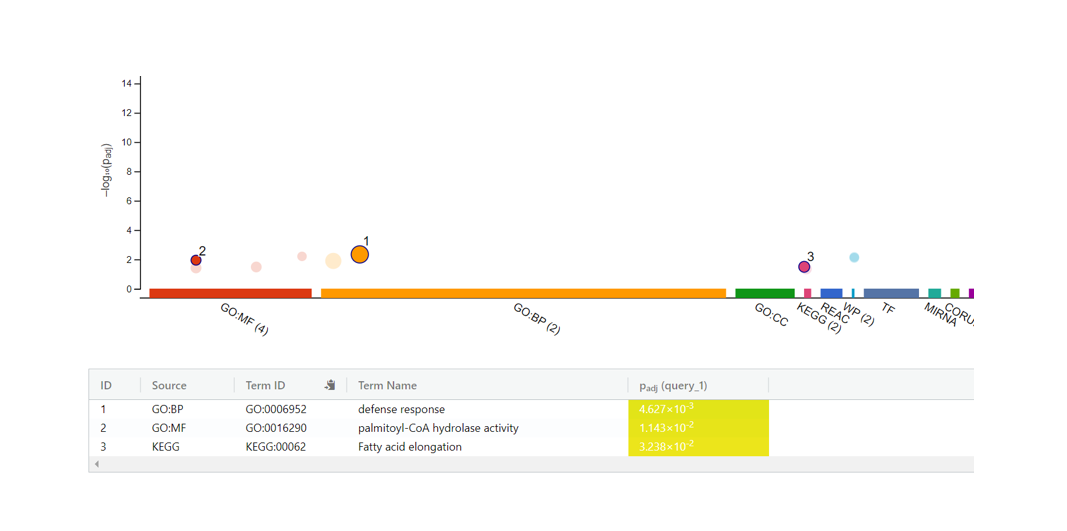

Ranking annotations on: http://cbl-gorilla.cs.technion.ac.il/

# <center>GORILLA </center><br /> 

In [77]:
#Up regulated genes first by sorting logfoldchange in descending order
cat clean_results_deseq_analysis.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCdesc.txt

In [78]:
#Down regulated genes first by sorting logfoldchange in ascending order
cat clean_results_deseq_analysis.tsv | sort -k3,3g   | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCasc.txt

In [79]:
grep -n Ptges3l  deseq.results.sortFCasc.txt 
grep -n Ptges3l  deseq.results.sortFCdesc.txt

18463:Ptges3l
10:Ptges3l


**For DESC order of LFC**

Biological Process (left) consists primarily of nervous and sensory system while the Molecular Function (right) is related to transmembrane transport activity.

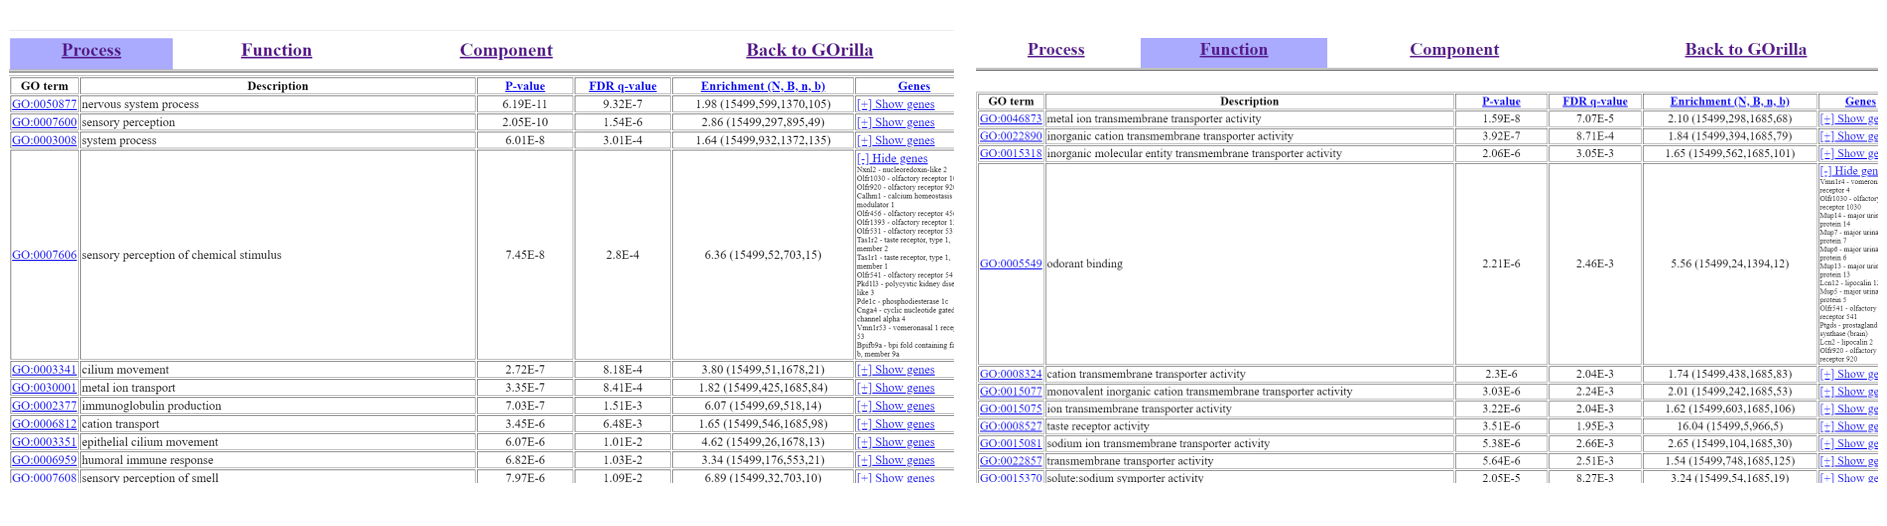

Cellular component is most significant for membrane regions

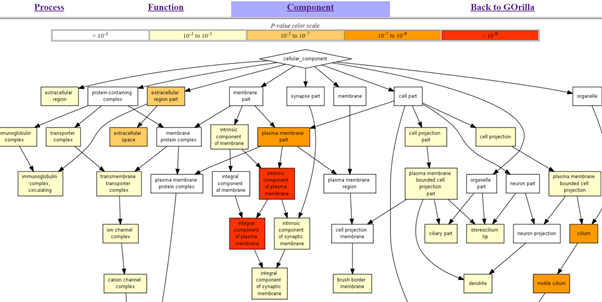

**For ASC order of LFC**

Biological Process (left) consists primarily of immune response while the Molecular Function (right) is related to transmembrane & signalling receptor activity.

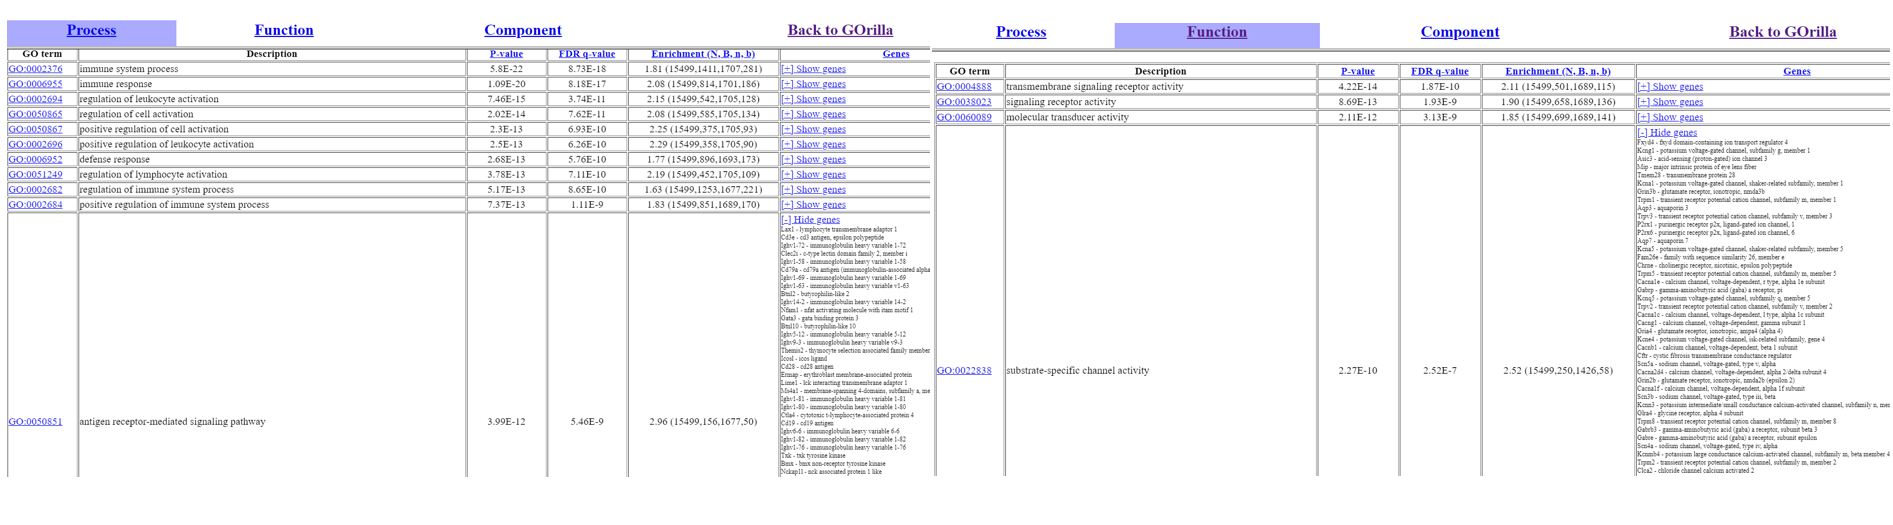

Cellular component is most significant for membrane regions

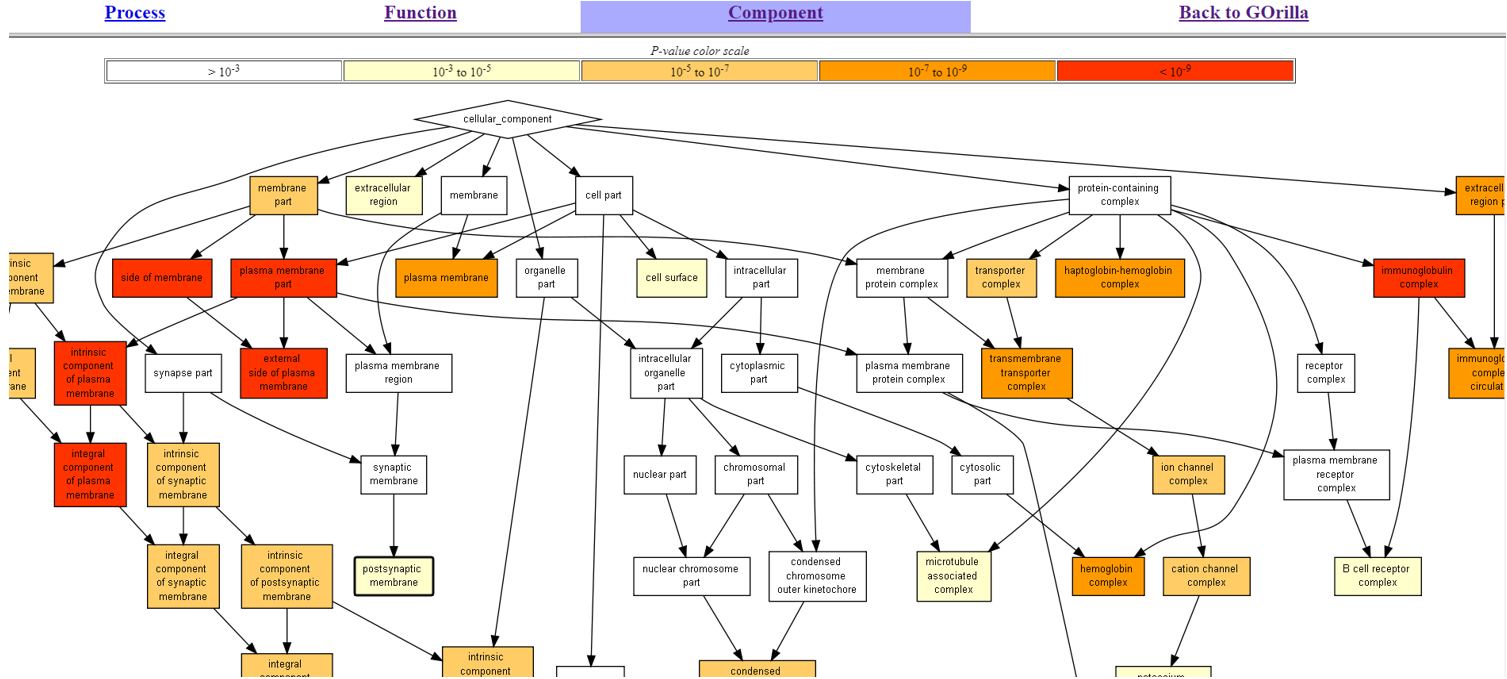

Creating Cytoscape interaction network using iRegulon with the up/down-regulated genes

# <center>CYTOSCAPE </center><br /> 

**UPREGULATED GENESET**

Shown below is the image of 2 expanded networks (first two transcription factors, Mybl1 & Nr2f1) that consist a total of 22 targets of which 6 are common. Evidently, many motifs appear associated by multiple transcription factors, for example Kynu by Mybl1 and Nr2f1.

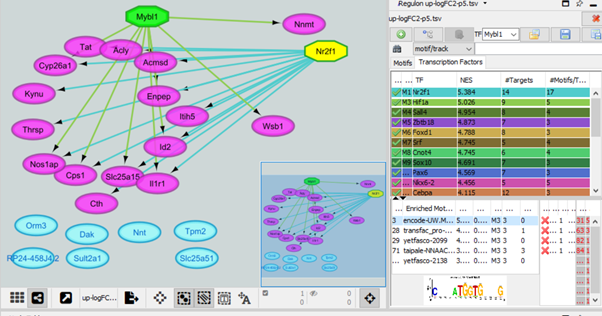

**DOWNREGULATED GENESET**

Shown below is the image of 4 expanded networks (transcription factors Irf4, Stat1, Myb & Irf2) that consist a total of 13 targets. Evidently, many motifs appear associated by multiple transcription factors, for example Cfp by Irf4 and Myb.

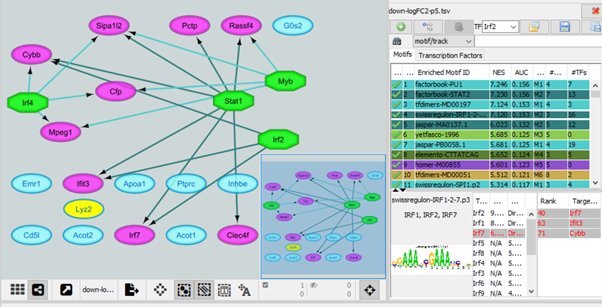

These graphs help to get a clearer view of how these gene motifs interact and the connections between them can be quantified to assesss the strength of particular transcription factors as well.

<center> |----------|-----------|------------| </center>